# EDA 및 지도학습 기본 실습
- titanic-clean 데이터

## [실습2]titanic 사고 데이터로 생존자 예측

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 데이터 로딩 및 탐색

In [4]:
df = pd.read_csv("ml_datas/titanic_clean.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num,Embarked_num,E_C,E_Q,E_S
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,1,2,0,0,1
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1,0,0
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,0,2,0,0,1
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2,0,0,1
4,5,0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,1,2,0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    float64
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         891 non-null    object 
 11  Embarked      891 non-null    object 
 12  Sex_num       891 non-null    int64  
 13  Embarked_num  891 non-null    int64  
 14  E_C           891 non-null    int64  
 15  E_Q           891 non-null    int64  
 16  E_S           891 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 118.5+ KB


In [8]:
df["Pclass"], df["Age"] = df["Pclass"].astype(int), df["Age"].astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num,Embarked_num,E_C,E_Q,E_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,B96 B98,S,1,2,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,B96 B98,S,0,2,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,0,2,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,B96 B98,S,1,2,0,0,1


### EDA 수행
- 각 컬럼이 어떤 연관성이 있는지 확인

#### 컬럼 확인
- 필요한 데이터 컬럼 추출
- 데이터 프레임 corr() : 피어슨 상관 계수 실행
    - range(-1, 1)
        - -1 : 변량 x의 값이 커짐에 따라 변량 y의 값이 대체로 작아지면, 변량 x, y 사이에는 **음의 상관관계** 
        - 0 : 상관 관계 없음
        - 1 : 변량 x의 값이 커짐에 따라 변량 y의 값이 대체로 커지면, 변량 x, y 사이에는 **양의 상관관계**
- sns.heatmap() 확인

In [12]:
df_eda = df.loc[:, 'PassengerId':'Embarked']
df_eda.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,B96 B98,S


In [23]:
df_eda2 = df.loc[:, ["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare", "Sex_num", "Embarked_num"]]
df_eda2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_num,Embarked_num
0,0,3,22,1,0,7.2500,1,2
1,1,1,38,1,0,71.2833,0,0
2,1,3,26,0,0,7.9250,0,2
3,1,1,35,1,0,53.1000,0,2
4,0,3,35,0,0,8.0500,1,2


<Axes: >

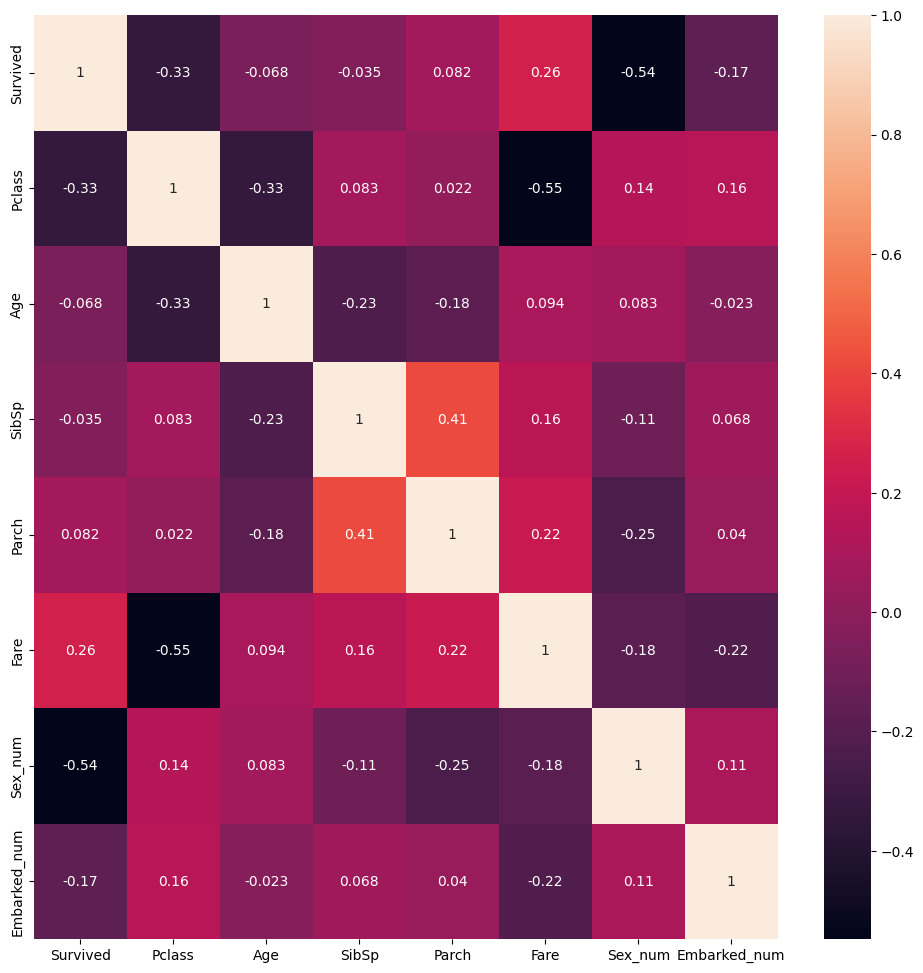

In [24]:
plt.figure(figsize=(12,12))
sns.heatmap(df_eda2.corr(), annot=True)

<Axes: >

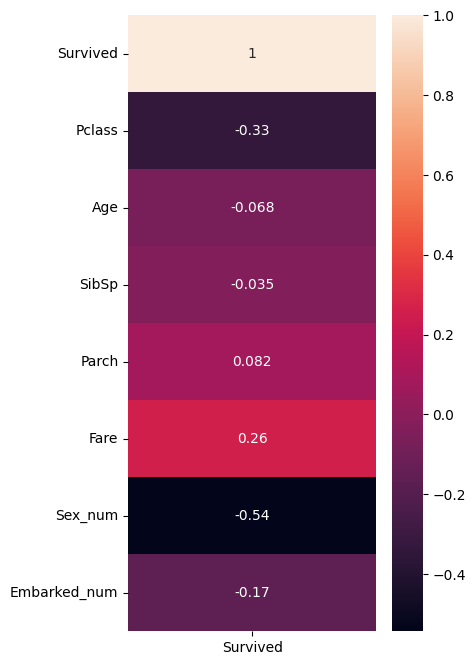

In [26]:
plt.figure(figsize=(4,8))
sns.heatmap(df_eda2.corr()[["Survived"]], annot=True)

### 생존자(Survived) 컬럼과 각 피처간의 관계 살펴보기

<Axes: xlabel='Pclass', ylabel='Count'>

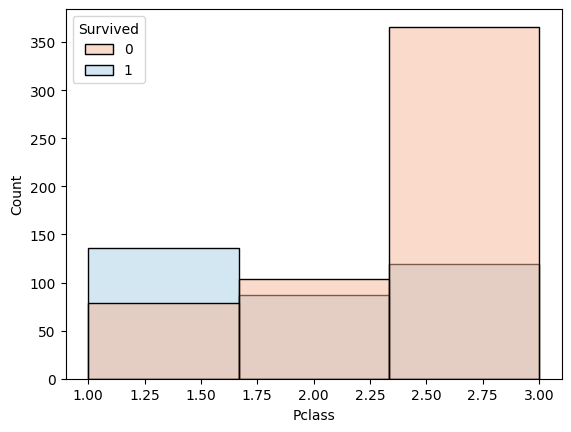

In [27]:
# 좌석 등급과 생존과의 관계
sns.histplot(data=df_eda, x="Pclass", hue='Survived', bins=3, palette='RdBu')

<Axes: xlabel='Sex', ylabel='Count'>

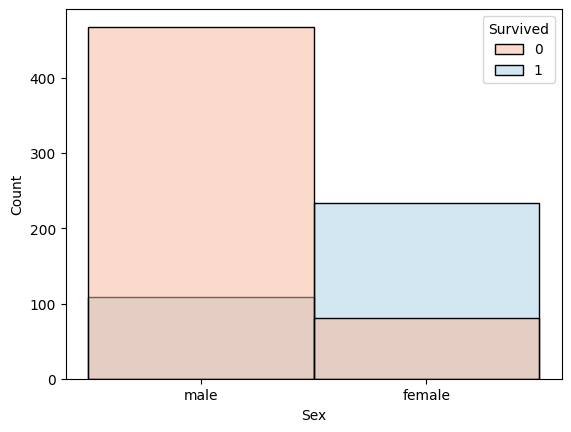

In [28]:
# 성별과 생존과의 관계를 histplot()
sns.histplot(data=df_eda, x="Sex", hue='Survived', bins=2, palette='RdBu')

<Axes: xlabel='Age', ylabel='Count'>

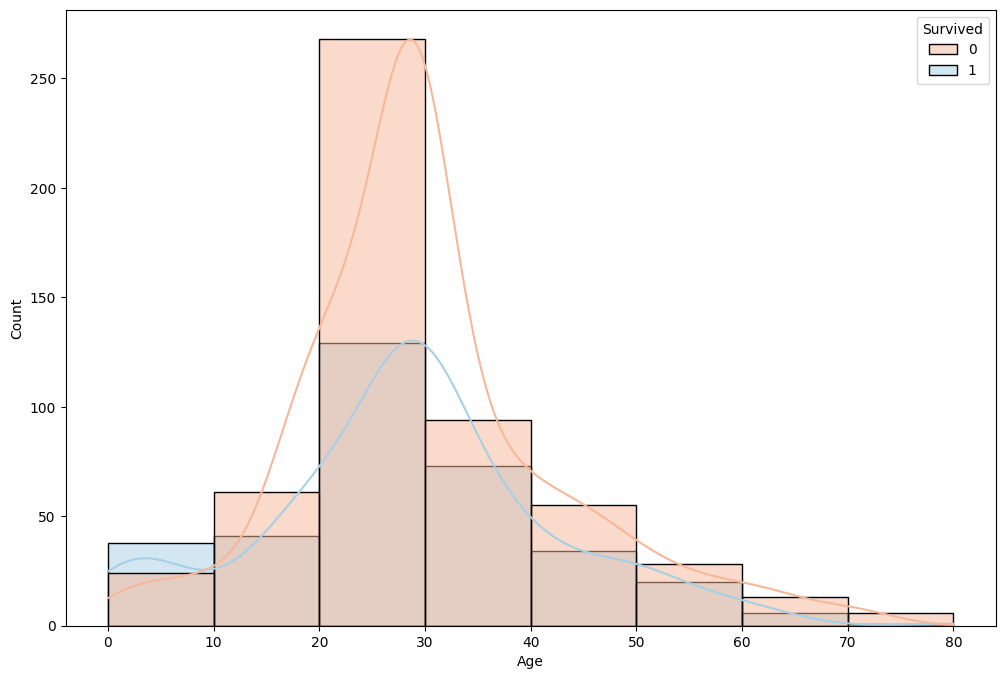

In [31]:
# 나이와 생존과의 관계를 histplot()
plt.figure(figsize=(12, 8))
sns.histplot(data=df_eda, x="Age", hue="Survived", bins=8, palette="RdBu", kde=True)

In [32]:
# 탑승항구에 따른 탑승자수 카운트
df_eda['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked', ylabel='Count'>

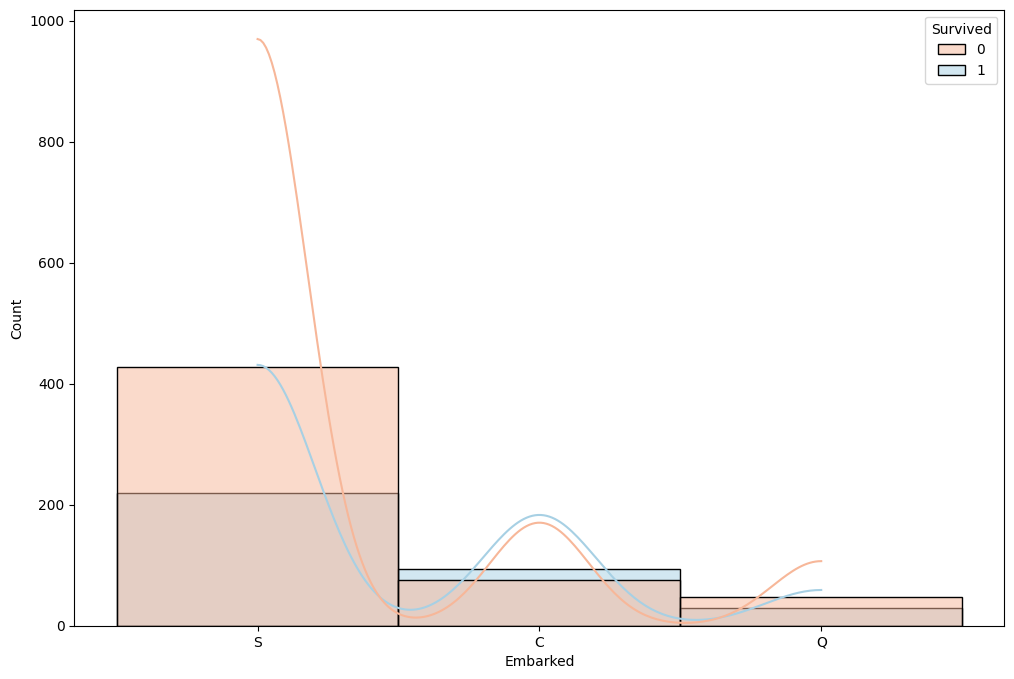

In [33]:
# 탑승항구에 따른 생존자 현황
plt.figure(figsize=(12,8))
sns.histplot(data=df_eda, x="Embarked",hue='Survived', palette='RdBu', kde=True)

<Axes: xlabel='Age', ylabel='count'>

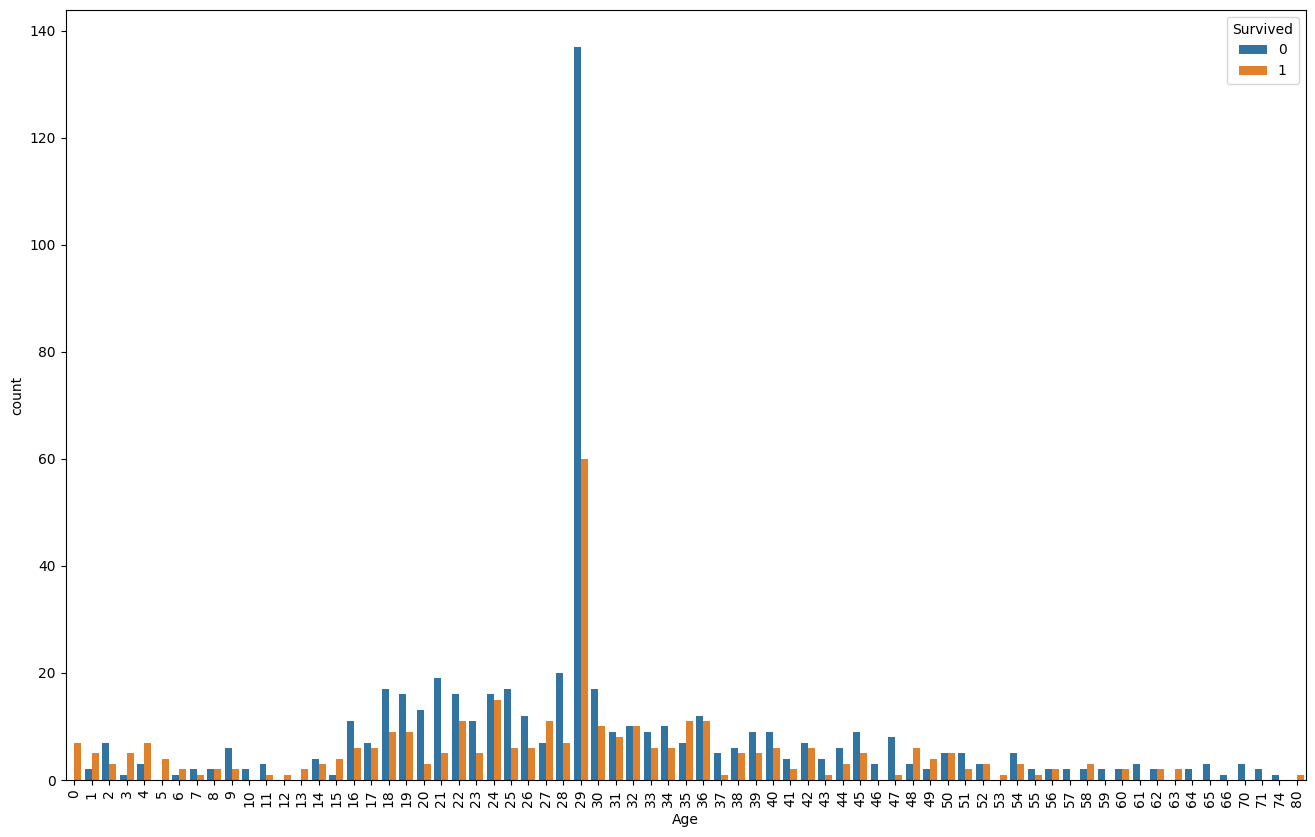

In [34]:
# 'Age'컬럼의 value별로 카운트하여 시각화
plt.figure(figsize=(16,10))
plt.xticks(rotation=90)
sns.countplot(data=df_eda, x='Age',  hue='Survived')

### [문제] 'Pclass' 별로 생존자 수와 사망자 수를 막대그래프로 시각화

<Axes: xlabel='Survived', ylabel='count'>

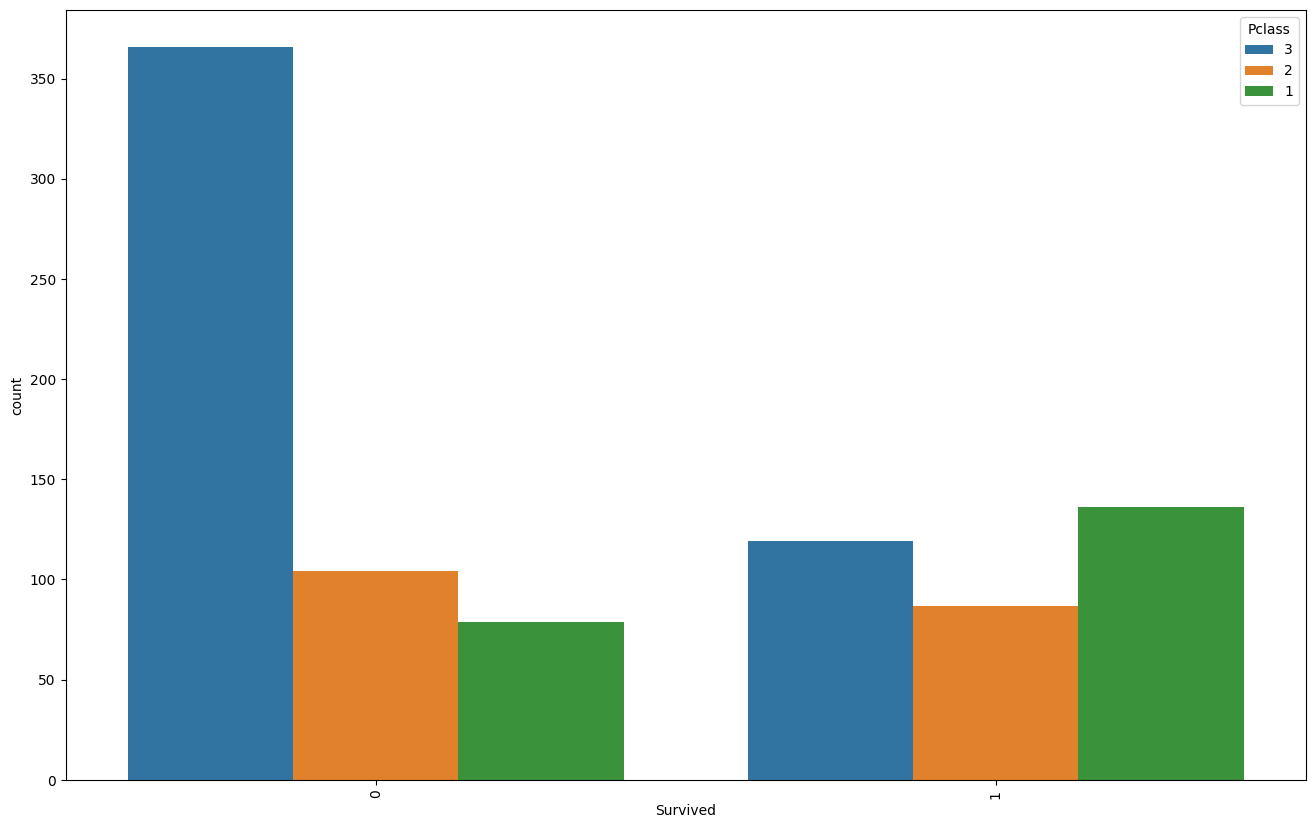

In [41]:
plt.figure(figsize=(16,10))
plt.xticks(rotation=90)
# sns.countplot(data=df_eda, x='Survived',  hue=df_eda["Pclass"])
sns.countplot(data=df_eda, x='Survived',  hue=df_eda["Pclass"], hue_order=[3, 2, 1]) # hue 표기를 바꾸고 싶을 경우

### [문제] 'Embarked' 탑승 항구별로 생존자 수 확인

<Axes: xlabel='Survived', ylabel='count'>

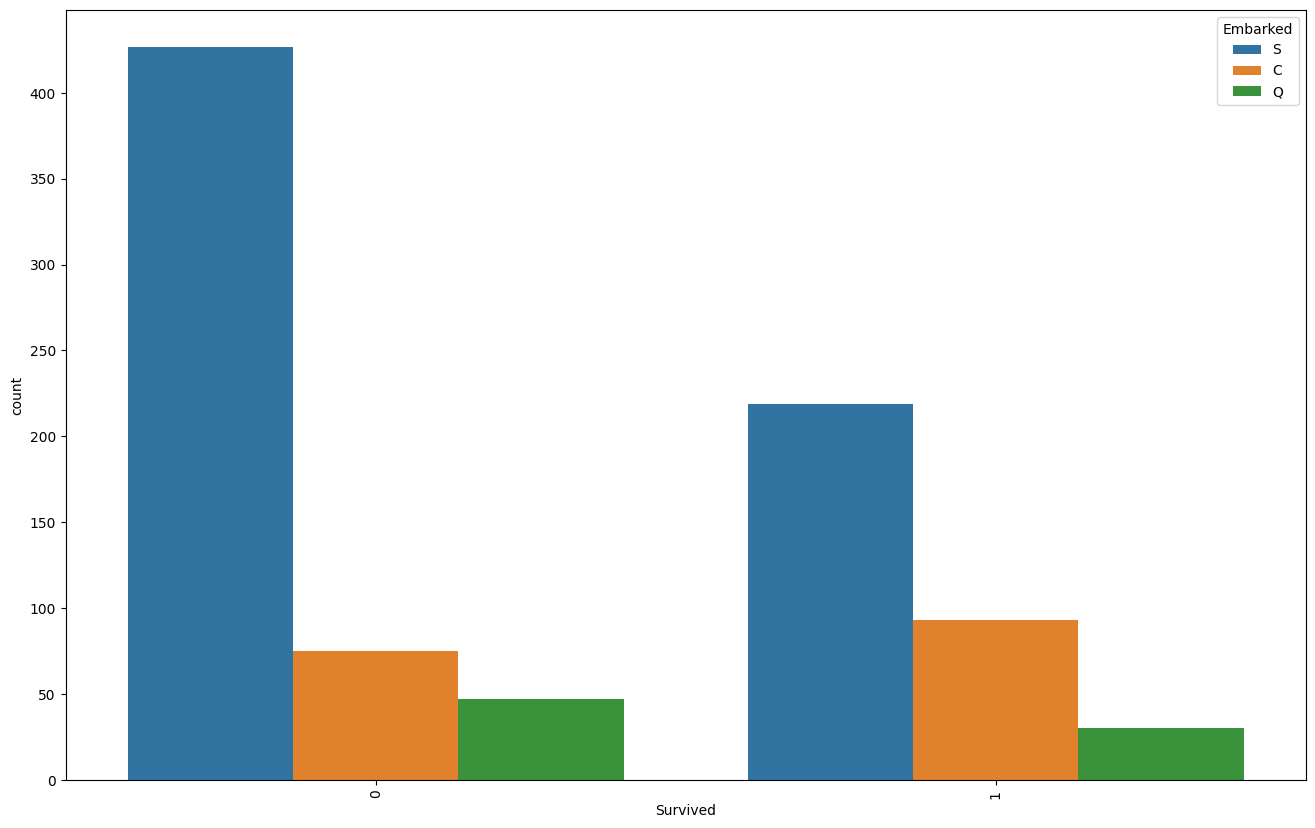

In [38]:
plt.figure(figsize=(16,10))
plt.xticks(rotation=90)
sns.countplot(data=df_eda, x='Survived',  hue=df_eda["Embarked"])

## 특징 데이터(X, feature)와 정답 데이터(y, target) 분할
- feature(X), target(y)

In [42]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_num',
       'Embarked_num', 'E_C', 'E_Q', 'E_S'],
      dtype='object')

In [47]:
# 머신 러닝에서 사용할 데이터 컬럼 정해서 추출
X = ["Pclass", "Sex_num", "Age", "Fare", "E_C", "E_Q", "E_S"]
data_X = df[X]
data_X

,Pclass,Sex_num,Age,Fare,E_C,E_Q,E_S
0,3,1,22,7.2500,0,0,1
1,1,0,38,71.2833,1,0,0
2,3,0,26,7.9250,0,0,1
3,1,0,35,53.1000,0,0,1
4,3,1,35,8.0500,0,0,1
...,...,...,...,...,...,...,...
886,2,1,27,13.0000,0,0,1
887,1,0,19,30.0000,0,0,1
888,3,0,29,23.4500,0,0,1
889,1,1,26,30.0000,1,0,0


In [49]:
# X 값의 행의 데이터와 대비되는 데이터
data_y = df["Survived"]
data_y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [51]:
data_X.shape, data_y.shape # X 가 하나일 때는 선형이지만, 현재 test data X값은 여러개임

((891, 7), (891,))

## 학습 데이터(train data)와 테스트 데이터(test data) 분할
- 학습 데이터(X_train, y_train)
- 테스트 데이터(X_test)
- test_y : 성능 평가시 y_predict와 비교 평가
- from sklearn.model_selection import train_test_split

In [52]:
from sklearn.model_selection import train_test_split

### train_test_split 사용법
- **train_test_split(X값, y값, test_size=default:0.25, shuffle=default:True, random_state = 시드값)**
- train_test_split(data_X, data_y, test_size=0.25, shuffle=True, random_state = 42)
    - **test_size**: validation set에 할당할 비율 (20% -> 0.2), 기본 0.25(25%)
    - **shuffle**: 데이터를 섞어서 분할, 셔플 옵션 (기본 True)
    - **random_state**: 랜덤 시드값

In [174]:
# 순서 중요 : X_train, X_test, y_train, y_test = train_test_split(data_X, data_y)
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=20)

In [164]:
print(y_test)

347    1
674    0
791    0
836    0
56     1
      ..
694    0
428    0
431    1
563    0
484    1
Name: Survived, Length: 179, dtype: int64


In [165]:
print(X_train.shape, y_train.shape)

(712, 7) (712,)


In [166]:
print(X_test.shape, y_test.shape)

(179, 7) (179,)


In [167]:
print(X_train.value_counts())
print("-"*60)
print(y_train.value_counts())
print("-"*60)
print(X_test.value_counts())
print("-"*60)
print(y_test.value_counts())

Pclass  Sex_num  Age  Fare     E_C  E_Q  E_S
3       1        29   8.0500   0    0    1      11
                      7.8958   0    0    1      10
        0        29   7.7500   0    1    0       8
        1        29   7.7500   0    1    0       7
                      7.2292   1    0    0       5
                                                ..
2       0        29   33.0000  0    0    1       1
                 30   12.3500  0    1    0       1
                      13.0000  0    0    1       1
                      21.0000  0    0    1       1
3       1        74   7.7750   0    0    1       1
Name: count, Length: 610, dtype: int64
------------------------------------------------------------
Survived
0    437
1    275
Name: count, dtype: int64
------------------------------------------------------------
Pclass  Sex_num  Age  Fare     E_C  E_Q  E_S
3       1        29   7.7500   0    1    0      5
                      7.2250   1    0    0      3
                      7.8958   0   

## 머신러닝 모델 학습하기
- Stochastic Gradient Desscent(SGD) : 확률적 경사하강법

### 머신 러닝 모델 학습 순서
- 모델 객체 생성
- 모델 데이터(X_train, y_train)
- test
- 성능 평가

In [123]:
# 확률적 경사 하강법 모듈: SGDClassifier
from sklearn.linear_model import SGDClassifier

In [168]:
# 모델 객체 생성
model_sgdc = SGDClassifier()
print(model_sgdc)
print(type(model_sgdc))

SGDClassifier()
<class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'>


In [169]:
# 모델 학습 : 모델 데이터
model_sgdc.fit(X_train, y_train)

SGDClassifier()

In [170]:
# 예측하기 : test
y_pred = model_sgdc.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [171]:
print(list(y_test))

[1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1]


In [172]:
print(y_pred == y_test)

347     True
674    False
791    False
836    False
56      True
       ...  
694    False
428    False
431     True
563    False
484     True
Name: Survived, Length: 179, dtype: bool


In [77]:
import numpy as np

In [173]:
# 성능 평가
# np 내장 함수를 통해 return count 가능
np.unique(y_pred == y_test, return_counts=True)

(array([False,  True]), array([113,  66], dtype=int64))

In [79]:
# 정확도 평가
# (예측y = 실제y)/테스트값 갯수
125/(54+125)

0.6983240223463687

In [80]:
(y_pred == y_test).mean()

0.6983240223463687

In [82]:
# 정확도 계산 함수
# 방법1
from sklearn.metrics import accuracy_score
print("예측 정확도 : %.4f" % accuracy_score(y_pred, y_test))

예측 정확도 : 0.6983


In [83]:
# 방법2
# 정밀도(precision), 재현율(recall), 정확도(accuracy)
from sklearn.metrics import classification_report

In [84]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.66      0.82      0.73        90
           1       0.76      0.57      0.65        89

    accuracy                           0.70       179
   macro avg       0.71      0.70      0.69       179
weighted avg       0.71      0.70      0.69       179



## 학습모델
- 최적의 가설함수를 만드었다. 에러(정답(y)-예측(y_pred))가 최소인 함수를 찾음
- w : 기울기
- b : y 절편

In [89]:
# 각 X 들의 최적의 기울기 값 : X 값은 설정한 컬럼 갯수
model_sgdc.coef_

array([[ -65.13604657, -523.39816141,  -28.1794244 ,   79.17979397,
          67.90779323,   65.13604657,  -37.88053772]])

In [88]:
# 절편 : y값
model_sgdc.intercept_

array([195.44209464])

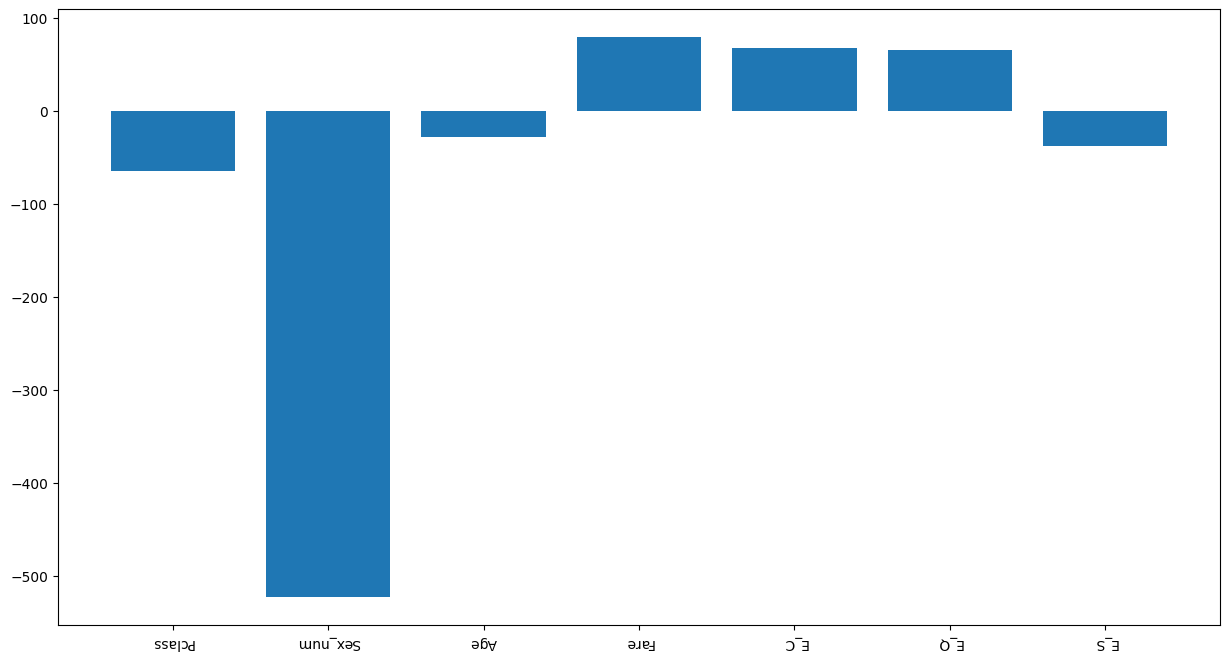

In [94]:
# sgd 모델의 coef_ 속성을 plot하기
fig = plt.figure(figsize=(15, 8))
plt.bar(X_train.columns, model_sgdc.coef_[0, :])
# plt.xticks(rotation=90)
plt.xticks(rotation=180)
plt.show()

In [95]:
coef_df = pd.DataFrame(zip(X_train.columns, model_sgdc.coef_[0,:])).sort_values(by=1, ascending=False)
coef_df

,0,1
3,Fare,79.179794
4,E_C,67.907793
5,E_Q,65.136047
2,Age,-28.179424
6,E_S,-37.880538
0,Pclass,-65.136047
1,Sex_num,-523.398161


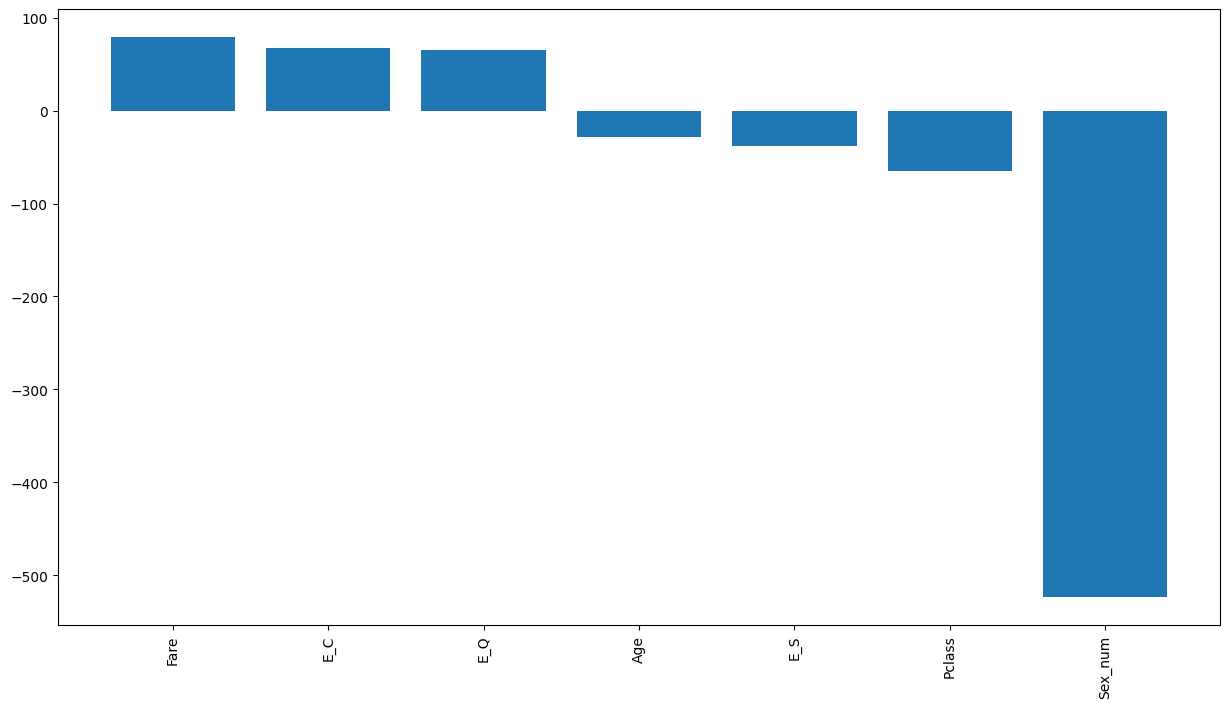

In [96]:
# sgd 모델의 coef_ 속성을 plot하기
fig = plt.figure(figsize=(15,8))
plt.bar(coef_df[0], coef_df[1])
plt.xticks(rotation=90)
plt.show()

### 결정 계수의 의미
- 예측에 가장 영향을 많이 미친 피처는 sex_num 임
- Pclass가 -값인 것은 좌성 등급 1등급이 생존율이 더 높음

## [문제] 결정 트리 학습기로 학습모델 만들기
- titanic 생존자 예측문제 DecisionTreeClassifier로 모델만들기

### 머신 러닝 모델 학습 순서
- 모델 객체 생성
- 모델 데이터(X_train, y_train)
- test
- 성능 평가

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# 순서 중요 : X_train, X_test, y_train, y_test = train_test_split(data_X, data_y)
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=20)

In [98]:
# 객체 생성
model_deci = DecisionTreeClassifier()

### 모델 만들기

In [99]:
model_deci.fit(X_train, y_train)

DecisionTreeClassifier()

### 예측하기

In [102]:
y_pred_de = model_deci.predict(X_test)
print(y_pred_de)

[0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1
 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1
 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0]


In [103]:
from sklearn.metrics import accuracy_score
print("예측 정확도 : %.4f" % accuracy_score(y_pred_de, y_test))

예측 정확도 : 0.8045


### 성능평가
- Predict를 수행하고 classification_report() 결과 출력하기

In [104]:
# 정밀도(precision), 재현율(recall), 정확도(accuracy) 확인
# classification_report() 결과 출력하기

In [105]:
from sklearn.metrics import classification_report

In [106]:
print(classification_report(y_pred_de, y_test))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       119
           1       0.69      0.77      0.72        60

    accuracy                           0.80       179
   macro avg       0.78      0.80      0.79       179
weighted avg       0.81      0.80      0.81       179



In [179]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=20)

In [180]:
print(X_train.value_counts())
print("-"*60)
print(y_train.value_counts())
print("-"*60)
print(X_test.value_counts())
print("-"*60)
print(y_test.value_counts())

Pclass  Sex_num  Age  Fare     E_C  E_Q  E_S
3       1        29   8.0500   0    0    1      11
                      7.8958   0    0    1      10
        0        29   7.7500   0    1    0       8
        1        29   7.7500   0    1    0       7
                      7.2292   1    0    0       5
                                                ..
2       0        29   33.0000  0    0    1       1
                 30   12.3500  0    1    0       1
                      13.0000  0    0    1       1
                      21.0000  0    0    1       1
3       1        74   7.7750   0    0    1       1
Name: count, Length: 610, dtype: int64
------------------------------------------------------------
Survived
0    437
1    275
Name: count, dtype: int64
------------------------------------------------------------
Pclass  Sex_num  Age  Fare     E_C  E_Q  E_S
3       1        29   7.7500   0    1    0      5
                      7.2250   1    0    0      3
                      7.8958   0   

In [181]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(data_X, data_y, test_size=0.2, random_state=20)

In [182]:
print(X_train1.value_counts())
print("-"*60)
print(y_train1.value_counts())
print("-"*60)
print(X_test1.value_counts())
print("-"*60)
print(y_test1.value_counts())

Pclass  Sex_num  Age  Fare     E_C  E_Q  E_S
3       1        29   8.0500   0    0    1      11
                      7.8958   0    0    1      10
        0        29   7.7500   0    1    0       8
        1        29   7.7500   0    1    0       7
                      7.2292   1    0    0       5
                                                ..
2       0        29   33.0000  0    0    1       1
                 30   12.3500  0    1    0       1
                      13.0000  0    0    1       1
                      21.0000  0    0    1       1
3       1        74   7.7750   0    0    1       1
Name: count, Length: 610, dtype: int64
------------------------------------------------------------
Survived
0    437
1    275
Name: count, dtype: int64
------------------------------------------------------------
Pclass  Sex_num  Age  Fare     E_C  E_Q  E_S
3       1        29   7.7500   0    1    0      5
                      7.2250   1    0    0      3
                      7.8958   0   